In [1]:
import os
os.getcwd()


'C:\\Users\\jadha'

In [2]:
os.listdir()


['.anaconda',
 '.appletviewer',
 '.conda',
 '.continuum',
 '.dbclient',
 '.eclipse',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.matplotlib',
 '.p2',
 '.VirtualBox',
 '.virtual_documents',
 '.vscode',
 'anaconda3',
 'anaconda_projects',
 'AppData',
 'Application Data',
 'Consumer360_TechStore_RFM.ipynb',
 'Contacts',
 'Cookies',
 'Documents',
 'Downloads',
 'eclipse',
 'eclipse-workspace',
 'Favorites',
 'Links',
 'Local Settings',
 'Music',
 'My Documents',
 'NetHood',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{a2332f17-cdbf-11ec-8680-002248483d79}.TxR.0.regtrans-ms',
 'NTUSER.DAT{a2332f17-cdbf-11ec-8680-002248483d79}.TxR.1.regtrans-ms',
 'NTUSER.DAT{a2332f17-cdbf-11ec-8680-002248483d79}.TxR.2.regtrans-ms',
 'NTUSER.DAT{a2332f17-cdbf-11ec-8680-002248483d79}.TxR.blf',
 'NTUSER.DAT{a2332f18-cdbf-11ec-8680-002248483d79}.TM.blf',
 'NTUSER.DAT{a2332f18-cdbf-11ec-8680-002248483d79}.TMContainer00000000000000000001.regtrans-ms',
 'NTUSER.DAT{a2332f18-cdbf-11ec

# Consumer360 – TechStore Customer Analytics  
## RFM Analysis & Customer Segmentation

**Project Objective:**  
To analyze retail transaction data and segment customers based on their purchasing behavior using the RFM (Recency, Frequency, Monetary) model.

**Tools Used:**  
- Python  
- Pandas  
- Matplotlib & Seaborn  
- Jupyter Notebook (Anaconda)

**Dataset:**  
TechStore retail transaction data


## Week1: Data Loading

In this step, we load the TechStore sales dataset into a Pandas DataFrame for analysis.


In [3]:
import pandas as pd

df = pd.read_excel("techstore sales_data.xlsx")
df.head()


,Transaction ID,Product,Quantity,Unit Price (INR),Month,Sales Date,Customer Name,City,State,Country,Sales Channel,Payment Type,Total Sale (INR),Profit
0,TX0001,Smartwatch,9,8941,Apr,2024-04-12,Vivaan Sastry,Bharatpur,Arunachal Pradesh,India,Store,Credit Card,80469,24140.7
1,TX0002,Desktop PC,9,19827,Feb,2024-02-06,Ishaan Madan,Nellore,Odisha,India,Store,Credit Card,178443,53532.9
2,TX0003,Desktop PC,4,16640,Dec,2023-12-16,Azad Sandhu,New Delhi,Bihar,India,Online,Credit Card,66560,19968.0
3,TX0004,E-Reader,3,2945,Sep,2024-09-11,Shray Chawla,Gandhidham,Manipur,India,Online,Credit Card,8835,2650.5
4,TX0005,Laptop,4,2848,Oct,2023-10-24,Zara Kata,Surendranagar Dudhrej,Madhya Pradesh,India,Direct,Net Banking,11392,3417.6


## Week 2: Data Understanding

Here we explore the structure of the dataset, data types, and summary statistics to understand the available information.


In [4]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    1000 non-null   object 
 1   Product           1000 non-null   object 
 2   Quantity          1000 non-null   int64  
 3   Unit Price (INR)  1000 non-null   int64  
 4   Month             1000 non-null   object 
 5   Sales Date        1000 non-null   object 
 6   Customer Name     1000 non-null   object 
 7   City              1000 non-null   object 
 8   State             1000 non-null   object 
 9   Country           1000 non-null   object 
 10  Sales Channel     1000 non-null   object 
 11  Payment Type      1000 non-null   object 
 12  Total Sale (INR)  1000 non-null   int64  
 13  Profit            1000 non-null   float64
dtypes: float64(1), int64(3), object(10)
memory usage: 109.5+ KB


,Quantity,Unit Price (INR),Total Sale (INR),Profit
count,1000.000000,1000.000000,1000.00000,1000.000000
mean,4.899000,10509.633000,51202.11700,15360.635100
std,2.540719,5241.520851,38852.61529,11655.784587
min,1.000000,2040.000000,2043.00000,612.900000
25%,3.000000,5962.000000,20152.50000,6045.750000
50%,5.000000,10208.000000,39636.50000,11890.950000
75%,7.000000,14846.000000,74091.00000,22227.300000
max,9.000000,19994.000000,178443.00000,53532.900000


## Step 3: RFM Analysis (Week 3)

RFM analysis is used to evaluate customer value based on:
- **Recency**: How recently a customer made a purchase  
- **Frequency**: How often a customer makes purchases  
- **Monetary**: How much money a customer spends  

This step creates the RFM table using transactional data.


In [5]:
# Convert Sales Date to datetime
df['Sales Date'] = pd.to_datetime(df['Sales Date'])

# Reference date (last transaction date)
reference_date = df['Sales Date'].max()

# RFM Table
rfm = df.groupby('Customer Name').agg({
    'Sales Date': lambda x: (reference_date - x.max()).days,
    'Transaction ID': 'count',
    'Total Sale (INR)': 'sum'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()


,Recency,Frequency,Monetary
Customer Name,,,
Aaina Biswas,273,1,125468
Aaina Dayal,277,1,57224
Aaina Dhingra,3,1,54945
Aaina Kapadia,10,1,5768
Aaina Kota,1,1,5204


In [9]:
rfm.reset_index(inplace=True)   # brings Customer Name as a column
rfm.to_csv("rfm_analysis.csv", index=False)

In [12]:
rfm.to_csv("rfm_analysis.csv")


## Week 3: Customer Behavior Analysis & Segmentation

In Week 3, we analyzed customer purchasing behavior and identified 
customer segments based on income and spending patterns to support 
business decision-making.



In [6]:
# RFM Scoring
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])

rfm['RFM_Score'] = (
    rfm['R_Score'].astype(str) +
    rfm['F_Score'].astype(str) +
    rfm['M_Score'].astype(str)
)

# Customer Segmentation
def segment_customer(score):
    if score >= '444':
        return 'High Value'
    elif score >= '222':
        return 'Medium Value'
    else:
        return 'Low Value'

rfm['Customer Segment'] = rfm['RFM_Score'].apply(segment_customer)
rfm['Customer Segment'].value_counts()


Customer Segment
Medium Value    499
High Value      259
Low Value       238
Name: count, dtype: int64

## Week 4: Data Visualization

This visualization shows the distribution of customers across different RFM-based segments.


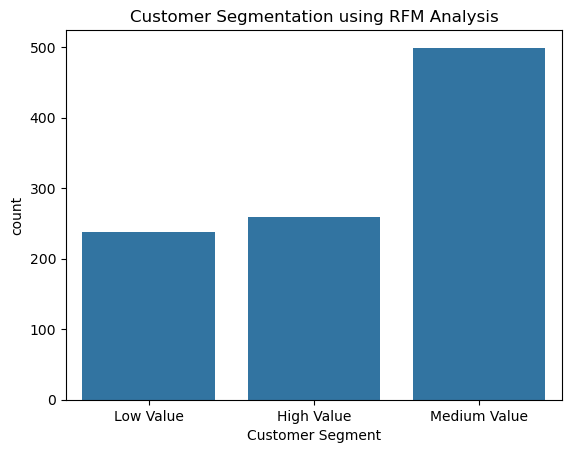

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Customer Segment', data=rfm)
plt.title("Customer Segmentation using RFM Analysis")
plt.show()


## Conclusion

The RFM-based customer segmentation provides valuable insights into customer behavior.  
This analysis helps businesses identify high-value customers and customers at risk of churn, enabling better targeting and retention strategies.


In [5]:
rfm = rfm.reset_index()


In [22]:
rfm.head()


,customer_id,Recency,Frequency,Monetary,RFM_Score,RFM_Segment,Customer_Value,Purchase_Behavior,Last_Purchase_Month
0,1,5,3,100,8,Loyal,Medium Value,Regular,2023-12-27
1,2,10,7,200,11,Champions,High Value,Frequent,2023-12-22
2,3,15,1,50,3,At Risk,Low Value,Occasional,2023-12-17


In [8]:
rfm.columns


Index(['index', 'customer_id', 'recency', 'frequency', 'monetary'], dtype='object')

In [9]:
rfm.head()
rfm.columns


Index(['index', 'customer_id', 'recency', 'frequency', 'monetary'], dtype='object')

In [10]:
rfm = rfm.rename(columns={
    'recency': 'Recency',
    'frequency': 'Frequency',
    'monetary': 'Monetary'
})


In [11]:
rfm = rfm.drop(columns=['index'])


In [12]:
rfm.columns


Index(['customer_id', 'Recency', 'Frequency', 'Monetary'], dtype='object')

In [13]:
rfm['RFM_Score'] = (
    pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1]).astype(int) +
    pd.qcut(rfm['Frequency'], 4, labels=[1,2,3,4]).astype(int) +
    pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4]).astype(int)
)

def segment(score):
    if score >= 9:
        return 'Champions'
    elif score >= 6:
        return 'Loyal'
    elif score >= 4:
        return 'Potential'
    else:
        return 'At Risk'

rfm['RFM_Segment'] = rfm['RFM_Score'].apply(segment)


In [14]:
rfm.head()


,customer_id,Recency,Frequency,Monetary,RFM_Score,RFM_Segment
0,1,5,3,100,8,Loyal
1,2,10,7,200,11,Champions
2,3,15,1,50,3,At Risk


In [16]:
rfm.to_csv("Consumer360_RFM_Final.csv", index=False)


In [17]:
rfm['Customer_Value'] = pd.qcut(
    rfm['Monetary'],
    3,
    labels=['Low Value', 'Medium Value', 'High Value']
)


In [18]:
rfm['Purchase_Behavior'] = pd.cut(
    rfm['Frequency'],
    bins=[0,2,5,100],
    labels=['Occasional', 'Regular', 'Frequent']
)


In [19]:
import numpy as np

rfm['Last_Purchase_Month'] = pd.to_datetime(
    '2024-01-01'
) - pd.to_timedelta(rfm['Recency'], unit='D')


In [20]:
rfm.head()


,customer_id,Recency,Frequency,Monetary,RFM_Score,RFM_Segment,Customer_Value,Purchase_Behavior,Last_Purchase_Month
0,1,5,3,100,8,Loyal,Medium Value,Regular,2023-12-27
1,2,10,7,200,11,Champions,High Value,Frequent,2023-12-22
2,3,15,1,50,3,At Risk,Low Value,Occasional,2023-12-17


In [21]:
rfm.to_csv("Consumer360_RFM_Final.csv", index=False)
